# Intro to Quantum Computing

---

2018/6/6 – WNixalo notes

[pyQuil Docs](http://pyquil.readthedocs.io/en/latest/intro.html#)

## From Bit to Qubit

### [probabilistic bits as vector spaces](http://pyquil.readthedocs.io/en/latest/intro.html#probabilistic-bits-as-vector-spaces)

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

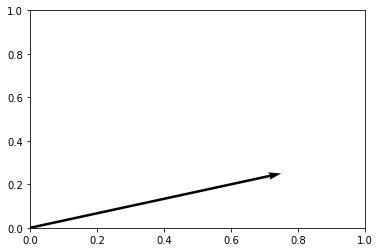

In [5]:
# http://pyquil.readthedocs.io/en/latest/intro.html
outcome_0 = np.array([1.0, 0.0]) # orthonorm basis vecs
outcome_1 = np.array([0.0, 1.0])
a = 0.75
b = 0.25
# vec(v) = a*vec(0) + b*vec(1)
prob_bit = a*outcome_0 + b*outcome_1

X,Y = prob_bit
fig,ax = plt.subplots()
ax.quiver(X,Y, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([0,1]); ax.set_ylim([0,1])
plt.draw(); plt.show()

$$Pr(i) = vec(v)^T\dot{}vec(i)$$

### [code](http://pyquil.readthedocs.io/en/latest/intro.html#some-code)

**NOTE**: [pyQuil must be installed and a Forest API connection set up](http://pyquil.readthedocs.io/en/latest/start.html).

In [7]:
# imports for pyQuil
import numpy as np
from pyquil.quil import Program
from pyquil.api import QVMConnection
quantum_simulator = QVMConnection()

# pyQuil is based around operations (or gates) so we'll start with the most 
# basic one: the identity oepration, I. I takes 1 argument: the index 
# of the qubit that it should be applied to.
from pyquil.gates import I

In [8]:
# Make a quantum program allocating 1 qubut (qubit #0) and doing nothing to it
p = Program(I(0))

# Quantum statse are called wavefunctions, historically.
# We can run this basic program on our connection to the simulator.
# This call will return the state of our qubits after we run the program p.
# This api call returns a tuple, but we'll ignore the scond value for now.
wavefunction = quantum_simulator.wavefunction(p)

# wavefunction is a Wavefunction object that stores a quantum state as a list of amplitudes
alpha, beta = wavefunction

print(f"Qubit in state α={alpha} and β={beta}")
print(f"Measurement probability of qubit in outcome 0 is {abs(alpha)**2}")
print(f"Measurement probability of qubit in outcome 1 is {abs(beta)**2}")

Qubit in state α=(1+0j) and β=0j
Measurement probability of qubit in outcome 0 is 1.0
Measurement probability of qubit in outcome 1 is 0.0


Applying an operation to our qubit affects the probability of each outcome:

In [10]:
def print_results(coeffs):
    alpha,beta = coeffs
    print(f"Qubit in state α={alpha} and β={beta}")
    print(f"Measurement probability of qubit in outcome 0 is {abs(alpha)**2}")
    print(f"Measurement probability of qubit in outcome 1 is {abs(beta)**2}")

In [9]:
# We can import the qubit "flip" operation, called X, and see what it does.
# We'll learn more about this operation in the next section.
from pyquil.gates import X

In [11]:
p = Program(X(0))

wavefunc = quantum_simulator.wavefunction(p)
alpha, beta = wavefunc

print_results((alpha,beta))

Qubit in state α=0j and β=(1+0j)
Measurement probability of qubit in outcome 0 is 0.0
Measurement probability of qubit in outcome 1 is 1.0


In this case we've flipped the probability of outcome 0 into the probability of outcome 1 for our qubit. We can also investigate what happens to the state of multiple qubits. We'd expect the state of multiple qubits to grow exponentially in size, as their vectors are tensored together.

In [16]:
# Multiple qubits also produce the expected scaling of the state.
p = Program(I(0), I(1))
wavefunction = quantum_simulator.wavefunction(p)
print(f"Quantum state is of dim: {len(wavefunction.amplitudes)}")

p = Program(I(0), I(1), I(2), I(3))
wavefunction = quantum_simulator.wavefunction(p)
print(f'Quantum state is of dim: {len(wavefunction.amplitudes)}')

p = Program()
for x in range(10):
    p += I(x)
wavefunction = quantum_simulator.wavefunction(p)
print(f"Quantum state is of dim: {len(wavefunction.amplitudes)}")

Quantum state is of dim: 4
Quantum state is of dim: 16
Quantum state is of dim: 1024


Looking at the actual value for the state of the 2 qubits combined. The resulting dictionary of this method contains outcomes as keys and probabilities of those outcomes as values.

In [17]:
# wavefunction(Program) returns a coefficient array that corresponds to outcomes in the following order
wavefunction = quantum_simulator.wavefunction(Program(I(0), I(1)))
print(wavefunction.get_outcome_probs())

{'00': 1.0, '01': 0.0, '10': 0.0, '11': 0.0}


## Qubit Operations

Since individual qubits are 2D vectors, operations on them are 2x2 matrices. The identity matrix leaves the state vector unchanged:
\begin{split}I = \left(\begin{matrix}
1 & 0\\
0 & 1
\end{matrix}\right)\end{split}

so the program that applies this operation to the zero state is just:
\begin{split} I\,|\,0\rangle = \left(\begin{matrix}
1 & 0\\
0 & 1
\end{matrix}\right)\left(\begin{matrix}
1 \\
0
\end{matrix}\right) = \left(\begin{matrix}
1 \\
0
\end{matrix}\right) = |\,0\rangle\end{split}

In [18]:
p = Program(I(0))
print(quantum_simulator.wavefunction(p))

(1+0j)|0>


### [pauli operators](http://pyquil.readthedocs.io/en/latest/intro.html#pauli-operators)

The `X` gate is one of the 3 important single-qubit gates, called Pauli Operators:

\begin{split}X = \left(\begin{matrix}
0 & 1\\
1 & 0
\end{matrix}\right)
\qquad
Y = \left(\begin{matrix}
0 & -i\\
i & 0
\end{matrix}\right)
\qquad
Z = \left(\begin{matrix}
1 & 0\\
0 & -1
\end{matrix}\right)\end{split}















In [66]:
def print_results(p_optr, state, careflip=True):
    prob = 1.
    if careflip: bitflip = int(wavefunction.get_outcome_probs()[str(state)]==prob)
    print(f"{p_optr}|{state}> = {wavefunction}")
    print(f"Outcome probabilities: {wavefunction.get_outcome_probs()}")
    if careflip: 
        result = ("looks like a bit flip","state looks unchanged")[bitflip]
        print(f"This {result}\n")

In [64]:
from pyquil.gates import X, Y, Z

In [65]:
p = Program(X(0))
wavefunction = quantum_simulator.wavefunction(p)
print_results("X", 0)

p = Program(Y(0))
wavefunction = quantum_simulator.wavefunction(p)
print_results("Y", 0)

p = Program(Z(0))
wavefunction = quantum_simulator.wavefunction(p)
print_results("Z", 0)

X|0> = (1+0j)|1>
Outcome probabilities: {'0': 0.0, '1': 1.0}
This looks like a bit flip

Y|0> = 1j|1>
Outcome probabilities: {'0': 0.0, '1': 1.0}
This looks like a bit flip

Z|0> = (1+0j)|0>
Outcome probabilities: {'0': 1.0, '1': 0.0}
This state looks unchanged



Quantum programs are built by applying successive gate operations:

In [75]:
# Composing qubit operations is the same as multiplying matrices sequentially
p = Program(X(0), Y(0), Z(0))
wavefunction = quantum_simulator.wavefunction(p)

print_results("ZYX", 0, careflip=False)

ZYX|0> = -1j|0>
Outcome probabilities: {'0': 1.0, '1': 0.0}


### [multi-qubit operations](http://pyquil.readthedocs.io/en/latest/intro.html#multi-qubit-operations)

Operations can be applied to composite states of multiple qubits. Example: the controlled-NOT (`CNOT`) gate that works on 2 qubits:

\begin{split}CNOT = \left(\begin{matrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{matrix}\right)\end{split}

In [77]:
from pyquil.gates import CNOT

In [151]:
def print_cnot(qbit_states):
    print(f"CNOT|{qbit_states} = {wavefunction}")
    print(f"Outcome probabilities\n{wavefunction.get_outcome_probs()}\n")

In [152]:
p = Program(CNOT(0, 1)) # input qbit states: 0,0
wavefunction = quantum_simulator.wavefunction(p)
print_cnot("00")

p = Program(X(0), CNOT(0, 1)) # flip qbit 0
wavefunction = quantum_simulator.wavefunction(p)
print_cnot("01")

p = Program(X(1), CNOT(0, 1)) # flip qbit 1
wavefunction = quantum_simulator.wavefunction(p)
print_cnot("10")

p = Program(X(0), X(1), CNOT(0, 1)) # flip qbits 0,1
wavefunction = quantum_simulator.wavefunction(p)
print_cnot("11")

CNOT|00 = (1+0j)|00>
Outcome probabilities
{'00': 1.0, '01': 0.0, '10': 0.0, '11': 0.0}

CNOT|01 = (1+0j)|11>
Outcome probabilities
{'00': 0.0, '01': 0.0, '10': 0.0, '11': 1.0}

CNOT|10 = (1+0j)|10>
Outcome probabilities
{'00': 0.0, '01': 0.0, '10': 1.0, '11': 0.0}

CNOT|11 = (1+0j)|01>
Outcome probabilities
{'00': 0.0, '01': 1.0, '10': 0.0, '11': 0.0}



The `CNOT` gate flips (negates) the 2nd qubit IFF the 1st qubit's state is 1 (true).

The `SWAP` gate swaps the $\rvert01\rangle$ and $\rvert10\rangle$ states:

\begin{split}SWAP = \left(\begin{matrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{matrix}\right)\end{split}

In [153]:
from pyquil.gates import SWAP

In [154]:
p = Program(X(0), SWAP(0,1))
wavefunction = quantum_simulator.wavefunction(p)

print(f"SWAP|01> = {wavefunction}")
print(f"Outcome probabilities\n{wavefunction.get_outcome_probs()}")

SWAP|01> = (1+0j)|10>
Outcome probabilities
{'00': 0.0, '01': 0.0, '10': 1.0, '11': 0.0}


---

**Summary**: quantum computing operations are composed of a series of complex matrices applied to complex vectors. These matrices must be unitary (their complex conjugate transpose equals their inverse) because the overall probability of all outcomes must sum to 1.

## The Quantum Abstract Machine

The programming model that underlies Quil is a hybrid–classical model in which $N$ qubits interact with $M$ classical bits:

<img src="http://pyquil.readthedocs.io/en/latest/_images/qam.png" >

[Quil whitepaper](https://arxiv.org/abs/1608.03355).

Quantum & Classical (Q/C) bits come with a defined gate set defining which gate operations can be applied to which qubits. The fixed gate set represents the limitations on which gates can be applied by different kinds of quantum computing hardware.

### [qubit measurements](http://pyquil.readthedocs.io/en/latest/intro.html#qubit-measurements)

Measurements have 2 effects:
1. project the state vector onto 1 of the basic outcomes.
2. (*optional*) store the outcome of the measurement in a C bit.

In [155]:
# Createa a program that stores the outcome of measuring qubit #0 into 
# classical register [0]
classical_register_index = 0
p = Program(I(0)).measure(0, classical_register_index)

On actual quantum hardware, we're unable to directly look at the wavefunction (we've been cheating up till now by looking). Instead we only have access to the C bits that are affected by measurements. This functionality is emulated by the `run` command.

In [156]:
# Choose which classical registers to look in at the end of the computation
classical_regs = [0,1]
print(quantum_simulator.run(p, classical_regs))

[[0, 0]]


Both registers are zero. If we'd flipped the qubit before measurement we'd get:

In [159]:
p = Program(X(0)) # Flip the qubit
p.measure(0, classical_register_index) # Measure the qubit

classical_regs = [0,1]
print(quantum_simulator.run(p, classical_regs))

[[1, 0]]


These are deterministic measurements. We'll get the same result from making them multiple times:

In [160]:
p = Program(X(0))
p.measure(0, classical_register_index)

classical_regs = [0]
trials = 10
print(quantum_simulator.run(p, classical_regs, trials))

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]


### [classical/quantum interaction](http://pyquil.readthedocs.io/en/latest/intro.html#classical-quantum-interaction)

In general, measurements can affect the quantum state. They act like projections onto the outcome basis states. To show this, we'll introduce a new single-qubit gate: the **Hadamard gate**. Matrix form:

\begin{split}H = \frac{1}{\sqrt{2}}\left(\begin{matrix}
1 & 1\\
1 & -1
\end{matrix}\right)\end{split}

In [161]:
from pyquil.gates import H

In [162]:
# The Hadamard produces a superposition state
coin_program = Program(H(0))
wavefunction = quantum_simulator.wavefunction(coin_program)

print(f"H|0> = {wavefunction}")
print(f"Outcome probs\n{wavefunction.get_outcome_probs()}")

H|0> = (0.7071067812+0j)|0> + (0.7071067812+0j)|1>
Outcome probs
{'0': 0.4999999999999999, '1': 0.4999999999999999}


In a sense, this Q bit really is a random variable representing a coin. In fact there's a continuous family of states of form:
$$\frac{1}{\sqrt{2}}\left(\rvert\,0\rangle + e^{i\theta}\rvert\,1\rangle\right)$$
represents the outcomes of an unbiased coin. Being able to work w/ all these different new states is part of what gives quantum computing extra power wrt C bits.

In [163]:
# Introduce measurement
classical_reg = 0
coin_program = Program(H(0)).measure(0, classical_reg)
trials = 10

# We probabilistic results of about half 1's and half 0's
print(quantum_simulator.run(coin_program, [0], trials))

[[1], [1], [1], [0], [0], [1], [0], [0], [1], [0]]


pyQuil lets us look at the wavefunction **after** a measurement as well:

In [166]:
clasical_reg = 0
coin_program = Program(H(0))
print(f"Before measurement: H|0> = {quantum_simulator.wavefunction(coin_program)}")

coin_program.measure(0, classical_reg)
for x in range(5):
    print(f"Afer meas: {quantum_simulator.wavefunction(coin_program)}")

Before measurement: H|0> = (0.7071067812+0j)|0> + (0.7071067812+0j)|1>
Afer meas: (1+0j)|1>
Afer meas: (1+0j)|1>
Afer meas: (1+0j)|0>
Afer meas: (1+0j)|0>
Afer meas: (1+0j)|0>


Measurement has an effect on the quantum state independent of what's stored classically. Observation of binary state (where previously it was probabilistic) is referred to as **collapse** of the wavefunction. Mathematically, the wavefunction is being projected onto the vector of the obtained outcome and subsequently rescaled to unit norm.

In [270]:
# This happens with bigger systems too
classical_reg = 0

# This program prepares something called a Bell state
# (a special kind of 'entangled state')
bell_program = Program(H(0), CNOT(0,1))
wavefunction = quantum_simulator.wavefunction(bell_program)
print(f"Before meas: Bell state = {wavefunction}")

bell_program.measure(0, clasical_reg)
for x in range(5):
    wavefunction = quantum_simulator.wavefunction(bell_program)
    print(f'After meas: {wavefunction.get_outcome_probs()}')

Before meas: Bell state = (0.7071067812+0j)|00> + (0.7071067812+0j)|11>
After meas: {'00': 0.0, '01': 0.0, '10': 0.0, '11': 1.0}
After meas: {'00': 0.9999999999999996, '01': 0.0, '10': 0.0, '11': 0.0}
After meas: {'00': 0.0, '01': 0.0, '10': 0.0, '11': 1.0}
After meas: {'00': 0.0, '01': 0.0, '10': 0.0, '11': 1.0}
After meas: {'00': 0.9999999999999996, '01': 0.0, '10': 0.0, '11': 0.0}


The above program prepared **entanglement** because, even though there're random outcomes after every measurement, both qubits are in the same state. They are either both $\rvert0\rangle$ or both $\rvert1\rangle$. This special kind of correlation is part of what makes quantum mechanics so unique and powerful.

### [classical control](http://pyquil.readthedocs.io/en/latest/intro.html#classical-control)

There are ways of introducing C control of Q programs. For example, we can use the state of classical bits to determine what Q operations to run:

In [273]:
true_branch = Program(X(7)) #  if branch
false_branch = Program(I(7)) # else branch

# Branch on classical reg [1]
p = Program(X(0)).measure(0,1).if_then(1, true_branch, false_branch)

# Measure qubit #7 into classical register [7]
p.measure(7,7)

# Run and check register [7]
print(quantum_simulator.run(p, [7]))

[[1]]


A `[1]` here means that qubit 7 was indeed flipped:

<img src="http://pyquil.readthedocs.io/en/latest/_images/branch.png" >

### [example: the probabilistic halting problem](http://pyquil.readthedocs.io/en/latest/intro.html#example-the-probabilistic-halting-problem)

A fun example is to create a program that has an exponentially increasing chance of halting... *but* that may run forever!

In [274]:
inside_loop = Program(H(0)).measure(0,1)

p = Program().inst(X(0)).while_do(1, inside_loop)

# Run and check register [1]
print(quantum_simulator.run(p, [1]))

[[0]]


<img src="http://pyquil.readthedocs.io/en/latest/_images/loop.png">

## Next Steps

* pyQuil [Installation and Getting Started](http://pyquil.readthedocs.io/en/latest/start.html)
guide.
* Want to learn more: book: *Quantum Computation and Quantum Information* – Nielsen & Chuang. Excellent resource for newcomers to the field.
* Interested in learning about quantum computing software: Rigetti blog posts: [The Quantum Software Challenge](https://medium.com/@rigetticomputing/the-quantum-software-challenge-1a86eec1ce47)